# ======================== Libaraies ======================

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ======================= Functions =======================

In [2]:
def prediction(data,labels):
    labels_pred = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        sequence       = data[i]
        sequence_label = labels[i].unsqueeze(0)
        
        hidden = rnn.initHidden()
        for j in range(sequence.size()[0]):
            output, hidden = rnn(sequence[j], hidden)
        
        labels_pred[i] = torch.argmax(output).numpy()
        
    acc = accuracy_score(labels, labels_pred)
    return labels_pred,acc

# =================== Parameters and input ===================

In [3]:
input_size  = 20
output_size = 2
hidden_size = 32

Nb_epochs   = 10

train_data    = torch.rand(1000,10,1,input_size)
train_labels  = torch.randint(0, output_size, (1000,))

test_data     = torch.rand(1000,10,1,input_size)
test_labels   = torch.randint(0, output_size, (1000,))

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

criterion = nn.NLLLoss()

# ===================== Creat RNN model =====================

- the architecture
![title](RNN.JPG)

In [4]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, S, hidden):
        
        combined = torch.cat((S, hidden), 1)
        
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
rnn      = RNN(input_size, hidden_size, output_size)

In [6]:
class RNN1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN1, self).__init__()

        self.hidden_size = hidden_size

        self.ihh = nn.Linear(hidden_size, hidden_size)
        self.ixh = nn.Linear(input_size, hidden_size)
        self.ho  = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, S, hidden):
        
        hidden = self.ihh(hidden)
        X      = self.ixh(S)
        
        hidden2  = torch.tanh(X + hidden)
        
        output   = self.ho(hidden2)
        output   = self.softmax(output)
        return output, hidden2

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
rnn      = RNN1(input_size, hidden_size, output_size)

# =============== Run the model for one step of  ===================

In [7]:
hidden =torch.zeros(1, hidden_size)
output, next_hidden = rnn(train_data[0,0], hidden)

# ===================== Train the network ========================

### - train one sequence

In [8]:
def train_sequence(sequence_label, sequence):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(sequence.size()[0]):
        output, hidden = rnn(sequence[i], hidden)
    
    loss = criterion(output, sequence_label)
    loss.backward()

    # Update model parameters: Add parameters' gradients to their values, multiplied by learning rate == OPTIMIZER.STEP
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

### Train the model for N epochs

In [9]:
train_acc = []
test_acc  = []
Loss = np.zeros(Nb_epochs)
for i in range(Nb_epochs):
    rnn.train()
    L = 0
    for j in range(train_data.shape[0]):
        sequence       = train_data[j]
        sequence_label = train_labels[j].unsqueeze(0)
        output,loss1   = train_sequence(sequence_label, sequence)
        L = L+loss1
    rnn.eval()    
    Loss[i] = L
    _,train_acc1 = prediction(train_data,train_labels)
    _,test_acc1  = prediction(test_data,test_labels)
    train_acc.append(train_acc1)
    test_acc.append(test_acc1)
    print(i)

0
1
2
3
4
5
6
7
8
9


# ========================= Plot loss ==========================

Text(0.5, 1.0, 'RNN loss')

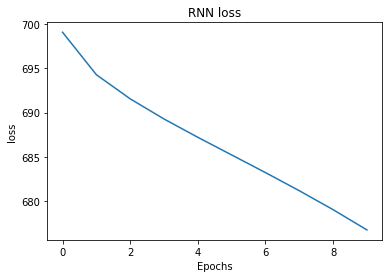

In [10]:
plt.plot(Loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('RNN loss')

Text(0.5, 1.0, 'RNN accuracy')

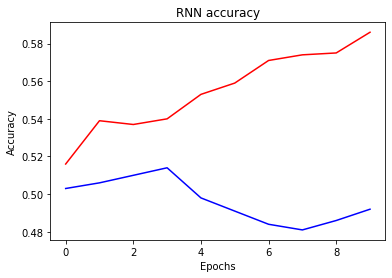

In [11]:
fig = plt.figure()
plt.plot(train_acc,label='Train acc',color='r')
plt.plot(test_acc,label='Test acc',color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN accuracy')